In [1]:
#pip install -e .
import FuzzySystem as fs

In [2]:
from FuzzySystem.MembershipFunction import Trimf, Gaussmf, GBellmf, Logmf, Tanhmf, Trapmf, Sigmoidmf, Cauchymf

trimf = Trimf([1,4,7])
#trimf.show()
gaussmf = Gaussmf([.5,1], universe=[-5,5])
#gaussmf.show()
gbellmf = GBellmf([1,2,5], universe=[-5,10])
#gbellmf.show()
logmf = Logmf([2,5], universe=[0,10])
#logmf.show()
tanhmf = Tanhmf([2,5], universe=[0,10])
#tanhmf.show()
sigmf = Sigmoidmf([-1,5], universe=[0,10])
#sigmf.show()
trapmf = Trapmf([0,2,4,6], universe=[0,10])
#trapmf.show()
cauchymf = Cauchymf([1,5], universe=[0,10])
#cauchymf.show()

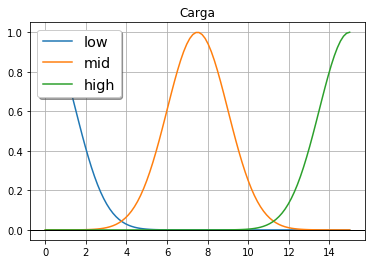

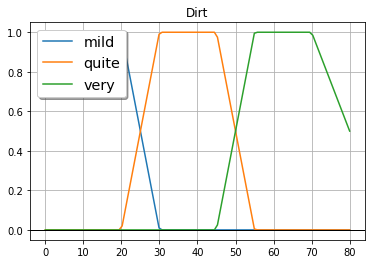

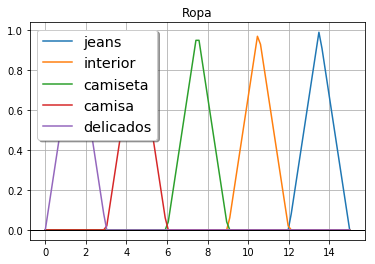

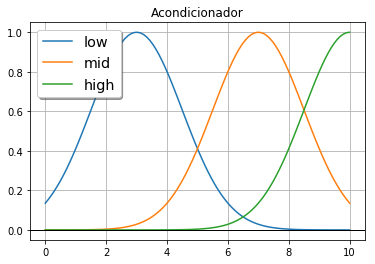

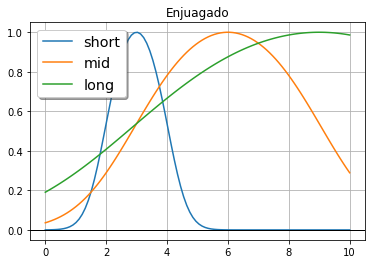

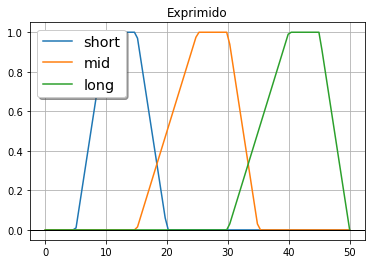

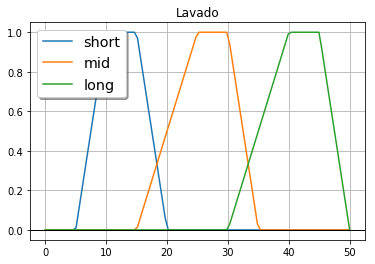

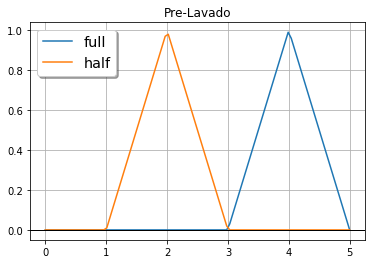

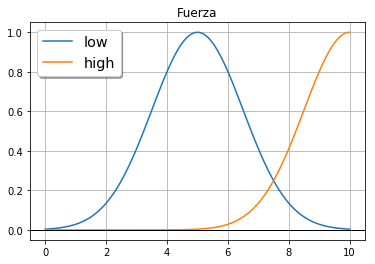

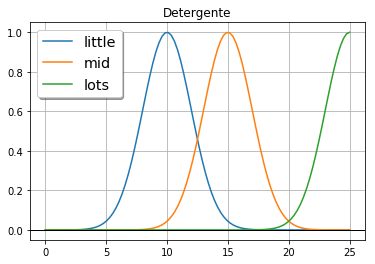

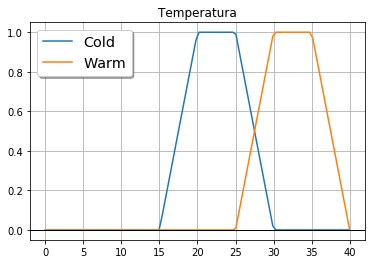


Evaluation of fis with inputs:
{'Carga': 8, 'Dirt': 15, 'Ropa': 1.5}

	IF TODO THEN Temperatura is Cold and Detergente is little and Fuerza is low and Lavado is short and Exprimido is short and Pre-Lavado is half and Enjuagado is short and Acondicionador is low = 1
Outputs: ['Temperatura', 'Detergente', 'Fuerza', 'Lavado', 'Exprimido', 'Pre-Lavado', 'Enjuagado', 'Acondicionador']


In [10]:
from FuzzySystem.FuzzySet import  FuzzySet
from FuzzySystem.FuzzyVariable import  FuzzyVariable
from FuzzySystem.FuzzyInferenceSystem import  FuzzyInferenceSystem, Antecedent,Consequent, FuzzyRule 
from FuzzySystem.Defuzzifier import Centroid
from FuzzySystem.MembershipFunction import Trimf, Gaussmf, GBellmf, Logmf, Tanhmf, Trapmf, Sigmoidmf, Cauchymf

#Lavadora 

#INPUTS

Carga_low = FuzzySet('low', Gaussmf([1.5, 0]))
Carga_mid = FuzzySet('mid', Gaussmf([1.5, 7.5]))
Carga_high = FuzzySet('high', Gaussmf([1.5, 15]))
Carga = FuzzyVariable('Carga',[Carga_low,Carga_mid,Carga_high], universe = [0,15])
Carga.show()

#Trapmf([a,b,c,d])
Dirt_mild = FuzzySet('mild', Trapmf([-5,0,20,30]))
Dirt_quite = FuzzySet('quite', Trapmf([20,30,45,55]))
Dirt_very = FuzzySet('very', Trapmf([45,55,70,90]))
Dirt = FuzzyVariable('Dirt',[Dirt_mild,Dirt_quite,Dirt_very],[0,80])
Dirt.show()

#Trimf(a,b,c)
Ropa_jeans = FuzzySet('jeans',Trimf([12,13.5,15]))
Ropa_under = FuzzySet('interior',Trimf([9,10.5,12]))
Ropa_tshirt = FuzzySet('camiseta',Trimf([6,7.5,9]))
Ropa_shirt = FuzzySet('camisa',Trimf([3,4.5,6]))
Ropa_deli = FuzzySet('delicados',Trimf([0,1.5,3]))
Ropa = FuzzyVariable('Ropa',[Ropa_jeans,Ropa_under,Ropa_tshirt,Ropa_shirt,Ropa_deli],[0,15])
Ropa.show()

#OUTPUT

#Acondicionador <0ml-10ml>
Cond_low = FuzzySet('low',Gaussmf([1.5,3]))
Cond_mid = FuzzySet('mid',Gaussmf([1.5,7]))
Cond_high = FuzzySet('high',Gaussmf([1.5,10]))
Cond = FuzzyVariable('Acondicionador',[Cond_low,Cond_mid,Cond_high], universe = [0,10])
Cond.show()

#Enjuague <1min-10min>
Tenj_s = FuzzySet('short',Logmf([1,3]))
Tenj_m = FuzzySet('mid',Logmf([3,6]))
Tenj_l = FuzzySet('long',Logmf([6,9]))
Tenj = FuzzyVariable('Enjuagado',[Tenj_s,Tenj_m,Tenj_l], universe = [0,10])
Tenj.show()

#Exprimido <5min-15min>
Texp_s = FuzzySet('short',Trapmf([5,10,15,20]))
Texp_m = FuzzySet('mid',Trapmf([15,25,30,35]))
Texp_l = FuzzySet('long',Trapmf([30,40,45,50]))
Texp = FuzzyVariable('Exprimido',[Texp_s,Texp_m,Texp_l], universe = [0,50])
Texp.show()

#Lavado <5min-50min>
Tlv_s = FuzzySet('short',Trapmf([5,10,15,20]))
Tlv_m = FuzzySet('mid',Trapmf([15,25,30,35]))
Tlv_l = FuzzySet('long',Trapmf([30,40,45,50]))
Tlv = FuzzyVariable('Lavado',[Tlv_s,Tlv_m,Tlv_l], universe = [0,50])
Tlv.show()

#Pre-lavado <0min-5min>
Tpr_y = FuzzySet('full',Trimf([3,4,5]))
Tpr_n = FuzzySet('half',Trimf([1,2,3]))
Tpr = FuzzyVariable('Pre-Lavado',[Tpr_y,Tpr_n],universe = [0,5])
Tpr.show()

#Intensidad <5N a 15N>
New_l = FuzzySet('low',Gaussmf([1.5,5]))
New_h = FuzzySet('high',Gaussmf([1.5,10]))
New = FuzzyVariable('Fuerza',[New_l,New_h], universe = [0,10])
New.show()

#Detergente <10ml - 25ml>
Det_s = FuzzySet('little',Gaussmf([2,10]))
Det_m = FuzzySet('mid',Gaussmf([2,15]))
Det_l = FuzzySet('lots',Gaussmf([2,25]))
Det = FuzzyVariable('Detergente',[Det_s,Det_m,Det_l], universe = [0,25])
Det.show()

#Temp <15°C - 38°C>
Temp_c = FuzzySet('Cold',Trapmf([15,20,25,30]))
Temp_w = FuzzySet('Warm',Trapmf([25,30,35,40]))
Temp = FuzzyVariable('Temperatura',[Temp_c,Temp_w], universe= [0,40])
Temp.show()


#RULES  
#    Carga[''] | Suciedad[''] | Ropa['']
#   Temp[''] | Det[''] | New[''] | Tlv[''] | Texp[''] | Tpr[''] | Tenj[''] | Cond['']
#INPUTS
#Carga [low,mid,high]
#Suiciedad[mild,quite,very]
#Ropa[jeans,interior,camisa,camiseta,delicados]

#OUTPUTS
#Temp[Cold,Warm]
#Det[little,mid,lots]
#Fuerza[low,high]
#Lavado[short,mid,long]
#Pre-lavado[full,half]
#Exprimido[short,mid,long]
#Enjuague[short,mid,long]
#Acondicionador[low,mid,high]
#

ant1 = Antecedent(Carga['low'] | Dirt['mild'] | Ropa['delicados'])
cont1 = Consequent([Temp['Cold'] , Det['little'] , New['low'] , Tlv['short'] , Texp['short'] , Tpr['half'] , Tenj['short'] , Cond['low']])
rule1 = FuzzyRule(ant1,cont1)


'''
ant2 = Antecedent(Carga['low'] | Dirt['mild'] | Ropa['interior'])
cont2 = Consequent([Temp['Warm'] | Det['mid'] | New['high'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule2 = FuzzyRule(ant2,cont2)



ant3 = Antecedent(Carga['low'] | Dirt['mild'] | Ropa['jeans'])
cont3 = Consequent([Temp['Warm'] | Det['mid'] | New['high'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule3 = FuzzyRule(ant3,cont3)



ant4 = Antecedent(Carga['low'] | Dirt['mild'] | Ropa['camisas'])
cont4 = Consequent([Temp['Warm'] | Det['mid'] | New['low'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule4 = FuzzyRule(ant4,cont4)

ant5 = Antecedent(Carga['low'] | Dirt['mild'] | Ropa['camisetas'])
cont5 = Consequent([Temp['Warm'] | Det['mid'] | New['low'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule5 = FuzzyRule(ant5,cont5)



ant6 = Antecedent(Carga['low'] | Dirt['quite'] | Ropa['delicados'])
cont6 = Consequent([Temp['Cold'] | Det['little'] | New['low'] | Tlv['low'] | Texp['short'] | Tpr['half'] | Tenj['short'] | Cond['low']])
rule6 = FuzzyRule(ant6,cont6)

ant7 = Antecedent(Carga['low'] | Dirt['quite'] | Ropa['interior'])
cont7 = Consequent([Temp['Warm'] | Det['mid'] | New['high'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule7 = FuzzyRule(ant7,cont7)

ant8 = Antecedent(Carga['low'] | Dirt['quite'] | Ropa['jeans'])
cont8 = Consequent([Temp['Warm'] | Det['mid'] | New['high'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule8 = FuzzyRule(ant8,cont8)

ant9 = Antecedent(Carga['low'] | Dirt['quite'] | Ropa['camisas'])
cont9 = Consequent([Temp['Warm'] | Det['mid'] | New['low'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule9 = FuzzyRule(ant9,cont9)

ant10 = Antecedent(Carga['low'] | Dirt['quite'] | Ropa['camisetas'])
cont10 = Consequent([Temp['Warm'] | Det['mid'] | New['low'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule10 = FuzzyRule(ant10,cont10)



ant11 = Antecedent(Carga['low'] | Dirt['very'] | Ropa['delicados'])
cont11 = Consequent([Temp['Cold'] | Det['little'] | New['low'] | Tlv['low'] | Texp['short'] | Tpr['half'] | Tenj['short'] | Cond['low']])
rule11 = FuzzyRule(ant11,cont11)

ant12 = Antecedent(Carga['low'] | Dirt['very'] | Ropa['interior'])
cont12 = Consequent([Temp['Warm'] | Det['mid'] | New['high'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule12 = FuzzyRule(ant12,cont12)

ant13 = Antecedent(Carga['low'] | Dirt['very'] | Ropa['jeans'])
cont13 = Consequent([Temp['Warm'] | Det['mid'] | New['high'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule13 = FuzzyRule(ant13,cont13)

ant14 = Antecedent(Carga['low'] | Dirt['very'] | Ropa['camisas'])
cont14 = Consequent([Temp['Warm'] | Det['mid'] | New['low'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule14 = FuzzyRule(ant14,cont14)

ant15 = Antecedent(Carga['low'] | Dirt['very'] | Ropa['camisetas'])
cont15 = Consequent([Temp['Warm'] | Det['mid'] | New['low'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule15 = FuzzyRule(ant15,cont15)

#-----------------------------------------------------------------------------------
ant16 = Antecedent(Carga['mid'] | Dirt['mild'] | Ropa['delicados'])
cont16 = Consequent([Temp['Cold'] | Det['little'] | New['low'] | Tlv['low'] | Texp['short'] | Tpr['half'] | Tenj['short'] | Cond['low']])
rule16 = FuzzyRule(ant16,cont16)

ant17 = Antecedent(Carga['mid'] | Dirt['mild'] | Ropa['interior'])
cont17 = Consequent([Temp['Warm'] | Det['mid'] | New['high'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule17 = FuzzyRule(ant17,cont17)

ant18 = Antecedent(Carga['mid'] | Dirt['mild'] | Ropa['jeans'])
cont18 = Consequent([Temp['Warm'] | Det['mid'] | New['high'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule18 = FuzzyRule(ant18,cont18)

ant19 = Antecedent(Carga['mid'] | Dirt['mild'] | Ropa['camisas'])
cont19 = Consequent([Temp['Warm'] | Det['mid'] | New['low'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule19 = FuzzyRule(ant19,cont19)

ant20 = Antecedent(Carga['mid'] | Dirt['mild'] | Ropa['camisetas'])
cont20 = Consequent([Temp['Warm'] | Det['mid'] | New['low'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule20 = FuzzyRule(ant20,cont20)



ant21 = Antecedent(Carga['mid'] | Dirt['quite'] | Ropa['delicados'])
cont21 = Consequent([Temp['Cold'] | Det['little'] | New['low'] | Tlv['low'] | Texp['short'] | Tpr['half'] | Tenj['short'] | Cond['low']])                                
rule21 = FuzzyRule(ant21,cont21)

ant22 = Antecedent(Carga['mid'] | Dirt['quite'] | Ropa['interior'])
cont22 = Consequent([Temp['Warm'] | Det['mid'] | New['high'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule22 = FuzzyRule(ant22,cont22)

ant23 = Antecedent(Carga['mid'] | Dirt['quite'] | Ropa['jeans'])
cont23 = Consequent([Temp['Warm'] | Det['mid'] | New['high'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule23 = FuzzyRule(ant23,cont23)

ant24 = Antecedent(Carga['mid'] | Dirt['quite'] | Ropa['camisas'])
cont24 = Consequent([Temp['Warm'] | Det['mid'] | New['low'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule24 = FuzzyRule(ant24,cont24)

ant25 = Antecedent(Carga['mid'] | Dirt['quite'] | Ropa['camisetas'])
cont25 = Consequent([Temp['Warm'] | Det['mid'] | New['low'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule25 = FuzzyRule(ant25,cont25)


ant26 = Antecedent(Carga['mid'] | Dirt['very'] | Ropa['delicados'])
cont26 = Consequent([Temp['Cold'] | Det['little'] | New['low'] | Tlv['low'] | Texp['short'] | Tpr['half'] | Tenj['short'] | Cond['low']])
rule26 = FuzzyRule(ant26,cont26)

ant27 = Antecedent(Carga['mid'] | Dirt['very'] | Ropa['interior'])
cont27 = Consequent([Temp['Warm'] | Det['mid'] | New['high'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule27 = FuzzyRule(ant27,cont27)

ant28 = Antecedent(Carga['mid'] | Dirt['very'] | Ropa['jeans'])
cont28 = Consequent([Temp['Warm'] | Det['mid'] | New['high'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule28 = FuzzyRule(ant28,cont28)

ant29 = Antecedent(Carga['mid'] | Dirt['very'] | Ropa['camisas'])
cont29 = Consequent([Temp['Warm'] | Det['mid'] | New['low'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule29 = FuzzyRule(ant29,cont29)

ant30 = Antecedent(Carga['mid'] | Dirt['very'] | Ropa['camisetas'])
cont30 = Consequent([Temp['Warm'] | Det['mid'] | New['low'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule30 = FuzzyRule(ant30,cont30)



#-----------------------------------------------------------------------------------
ant31 = Antecedent(Carga['high'] | Dirt['mild'] | Ropa['delicados'])
cont31 = Consequent([Temp['Cold'] | Det['little'] | New['low'] | Tlv['low'] | Texp['short'] | Tpr['half'] | Tenj['short'] | Cond['low']])
rule31 = FuzzyRule(ant31,cont31)

ant32 = Antecedent(Carga['high'] | Dirt['mild'] | Ropa['interior'])
cont32 = Consequent([Temp['Warm'] | Det['mid'] | New['high'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule32 = FuzzyRule(ant32,cont32)

ant33 = Antecedent(Carga['high'] | Dirt['mild'] | Ropa['jeans'])
cont33 = Consequent([Temp['Warm'] | Det['mid'] | New['high'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule33 = FuzzyRule(ant33,cont33)

ant34 = Antecedent(Carga['high'] | Dirt['mild'] | Ropa['camisas'])
cont34 = Consequent([Temp['Warm'] | Det['mid'] | New['low'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule34 = FuzzyRule(ant34,cont34)

ant35 = Antecedent(Carga['high'] | Dirt['mild'] | Ropa['camisetas'])
cont35 = Consequent([Temp['Warm'] | Det['mid'] | New['low'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule35 = FuzzyRule(ant35,cont35)



ant36 = Antecedent(Carga['high'] | Dirt['quite'] | Ropa['delicados'])
cont36 = Consequent([Temp['Cold'] | Det['little'] | New['low'] | Tlv['low'] | Texp['short'] | Tpr['half'] | Tenj['short'] | Cond['low']])
rule36 = FuzzyRule(ant36,cont36)

ant37 = Antecedent(Carga['high'] | Dirt['quite'] | Ropa['interior'])
cont37 = Consequent([Temp['Warm'] | Det['mid'] | New['high'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule37 = FuzzyRule(ant37,cont37)

ant38 = Antecedent(Carga['high'] | Dirt['quite'] | Ropa['jeans'])
cont38 = Consequent([Temp['Warm'] | Det['mid'] | New['high'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule38 = FuzzyRule(ant38,cont38)

ant39 = Antecedent(Carga['high'] | Dirt['quite'] | Ropa['camisas'])
cont39 = Consequent([Temp['Warm'] | Det['mid'] | New['low'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule39 = FuzzyRule(ant39,cont39)

ant40 = Antecedent(Carga['high'] | Dirt['quite'] | Ropa['camisetas'])
cont40 = Consequent([Temp['Warm'] | Det['mid'] | New['low'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule40 = FuzzyRule(ant40,cont40)


ant41 = Antecedent(Carga['high'] | Dirt['very'] | Ropa['delicados'])
cont41 = Consequent([Temp['Cold'] | Det['little'] | New['low'] | Tlv['low'] | Texp['short'] | Tpr['half'] | Tenj['short'] | Cond['low']])
rule41 = FuzzyRule(ant41,cont41)

ant42 = Antecedent(Carga['high'] | Dirt['very'] | Ropa['interior'])
cont42 = Consequent([Temp['Warm'] | Det['mid'] | New['high'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule42 = FuzzyRule(ant42,cont42)

ant43 = Antecedent(Carga['high'] | Dirt['very'] | Ropa['jeans'])
cont43 = Consequent([Temp['Warm'] | Det['mid'] | New['high'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule43 = FuzzyRule(ant43,cont43)

ant44 = Antecedent(Carga['high'] | Dirt['very'] | Ropa['camisas'])
cont44 = Consequent([Temp['Warm'] | Det['mid'] | New['low'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule44 = FuzzyRule(ant44,cont44)

ant45 = Antecedent(Carga['high'] | Dirt['very'] | Ropa['camisetas'])
cont45 = Consequent([Temp['Warm'] | Det['mid'] | New['low'] | Tlv['mid'] | Texp['mid'] | Tpr['full'] | Tenj['mid'] | Cond['mid']])
rule45 = FuzzyRule(ant45,cont45)
'''

#Building the FIS

#fis = FuzzyInferenceSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27,rule28,rule29,rule30,rule31,rule32,rule33,rule34,rule35,rule36,rule37,rule38,rule39,rule40,rule41,rule42,rule43,rule44,rule45])
fis = FuzzyInferenceSystem([rule1])
#FIS Evaluation

inputs = {'Carga':8, 'Dirt':15, 'Ropa':1.5}
result = fis.eval(inputs)
print(result)

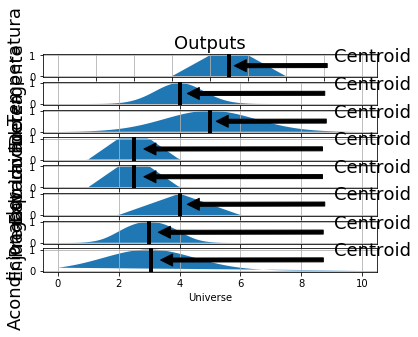

{'Temperatura': 22.5015873015873,
 'Detergente': 10.000002129161446,
 'Fuerza': 4.999999999999997,
 'Lavado': 12.502576788291075,
 'Exprimido': 12.502576788291075,
 'Pre-Lavado': 2.000103071531643,
 'Enjuagado': 3.0000417673825424,
 'Acondicionador': 3.07723509453085}

In [11]:
result.show(Centroid)
Centroid(result).eval()